In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [3]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-04-04 13:54:24--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3,8M) [text/plain]
Saving to: ‘adult.data.2’

adult.data.2        100%[===================>]   3,79M   272KB/s    in 14s     

2019-04-04 13:54:39 (275 KB/s) - ‘adult.data.2’ saved [3974305/3974305]



In [10]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [2]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [3]:
df = pd.read_csv('adult.data.1', sep=", ", header=None, engine='python')

In [4]:
df.columns = cols

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [6]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [7]:
df.groupby('sex').age.mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [8]:
df['native-country'].value_counts(normalize=True)['United-States']

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

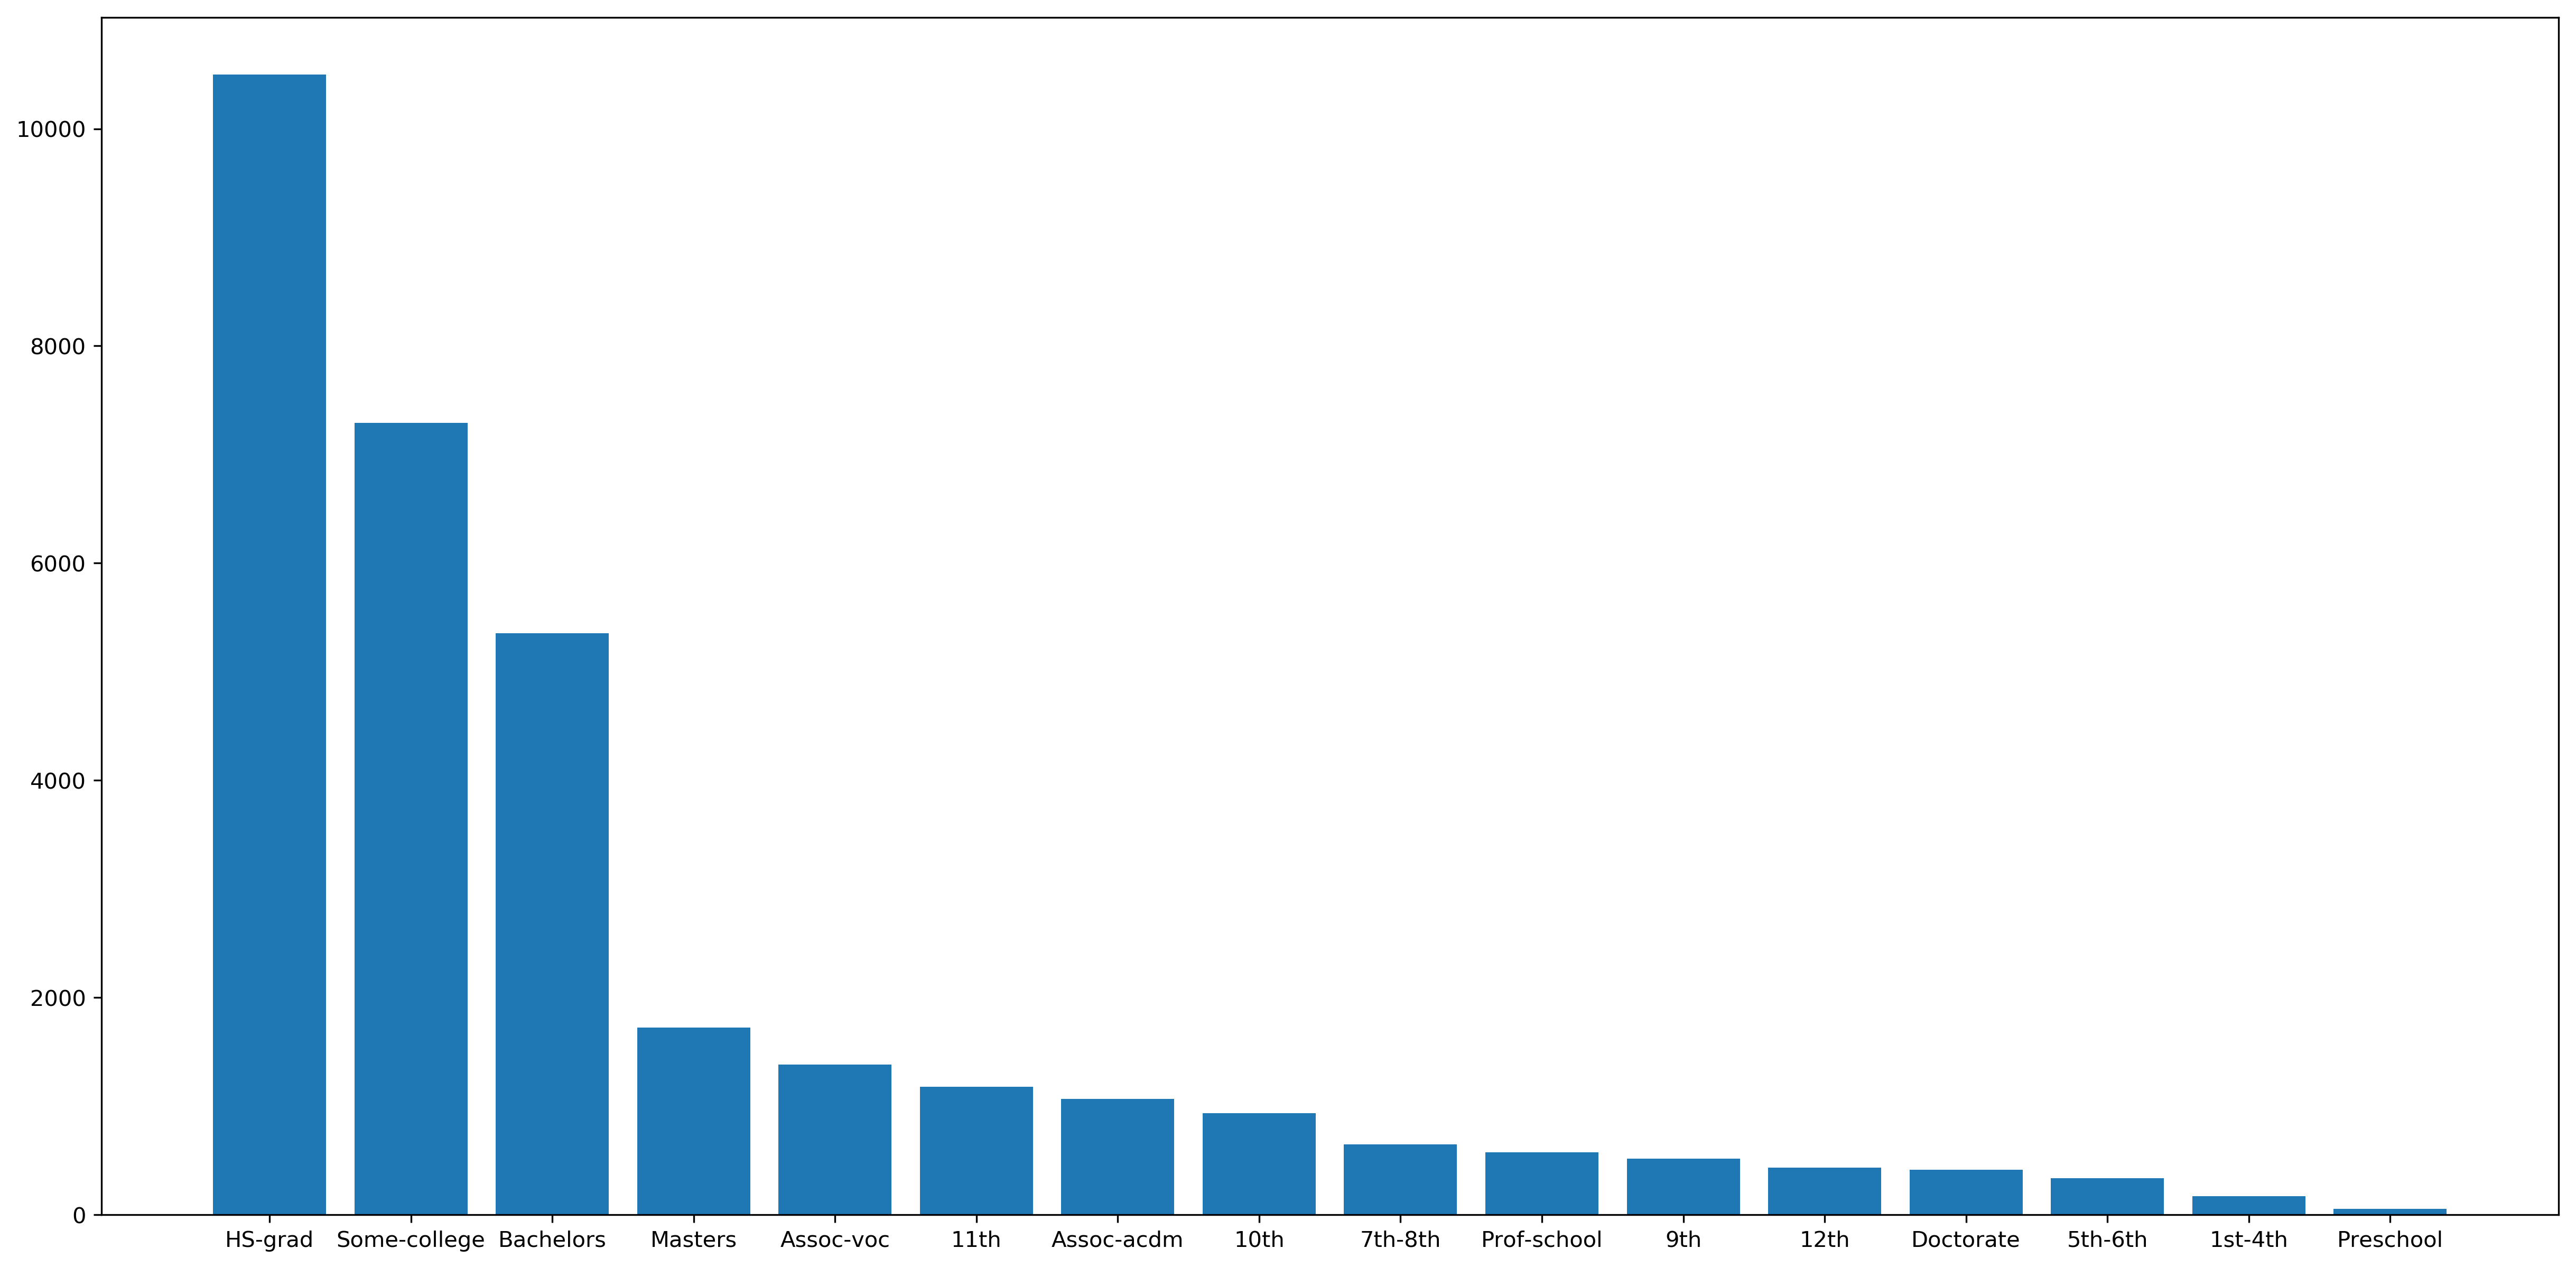

In [9]:
fig = plt.figure(figsize=(20,10), dpi=300)
plt.bar(df['education'].value_counts().index,
        df['education'].value_counts().values)
plt.show()

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df.groupby('marital-status').fnlwgt.mean()['Divorced']

185802.79045689848

In [12]:
df.groupby('marital-status').fnlwgt.std()['Divorced']

105646.78945933616

In [13]:
df.iloc[:,[2,5]][df.iloc[:,5] == 'Divorced']['fnlwgt']

2        215646
19       292175
24       109015
28       367260
32       386940
47       128354
53       251585
54       109832
64       105598
66       183175
84       343591
85       346253
91       286730
92       212563
98       171095
129      365739
134      146195
149      174662
150      186009
154      252903
158      191535
160       38317
162       78374
165      207157
181      114580
186      143129
187      135105
190      155222
196       99374
204       48211
          ...  
32404    379959
32412    149620
32414     83742
32422    161950
32427    206878
32429    203334
32431    274502
32432    208068
32454    257933
32470    485710
32471    185647
32473    160467
32477    114648
32484    268083
32490    134152
32491     63079
32492    217597
32493    381895
32500     60567
32504    208630
32508    155093
32516    176175
32523     77266
32525    120478
32534    179137
32538    139180
32543    119199
32544    199655
32546    198216
32549    255835
Name: fnlwgt, Length: 44

In [16]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [46]:
gaussian = np.random.normal(0.5, 2*np.sqrt(2*np.log(2)), 1000)
#poisson = np.random.poisson(lam=400, size=1000)

(0, 600000)

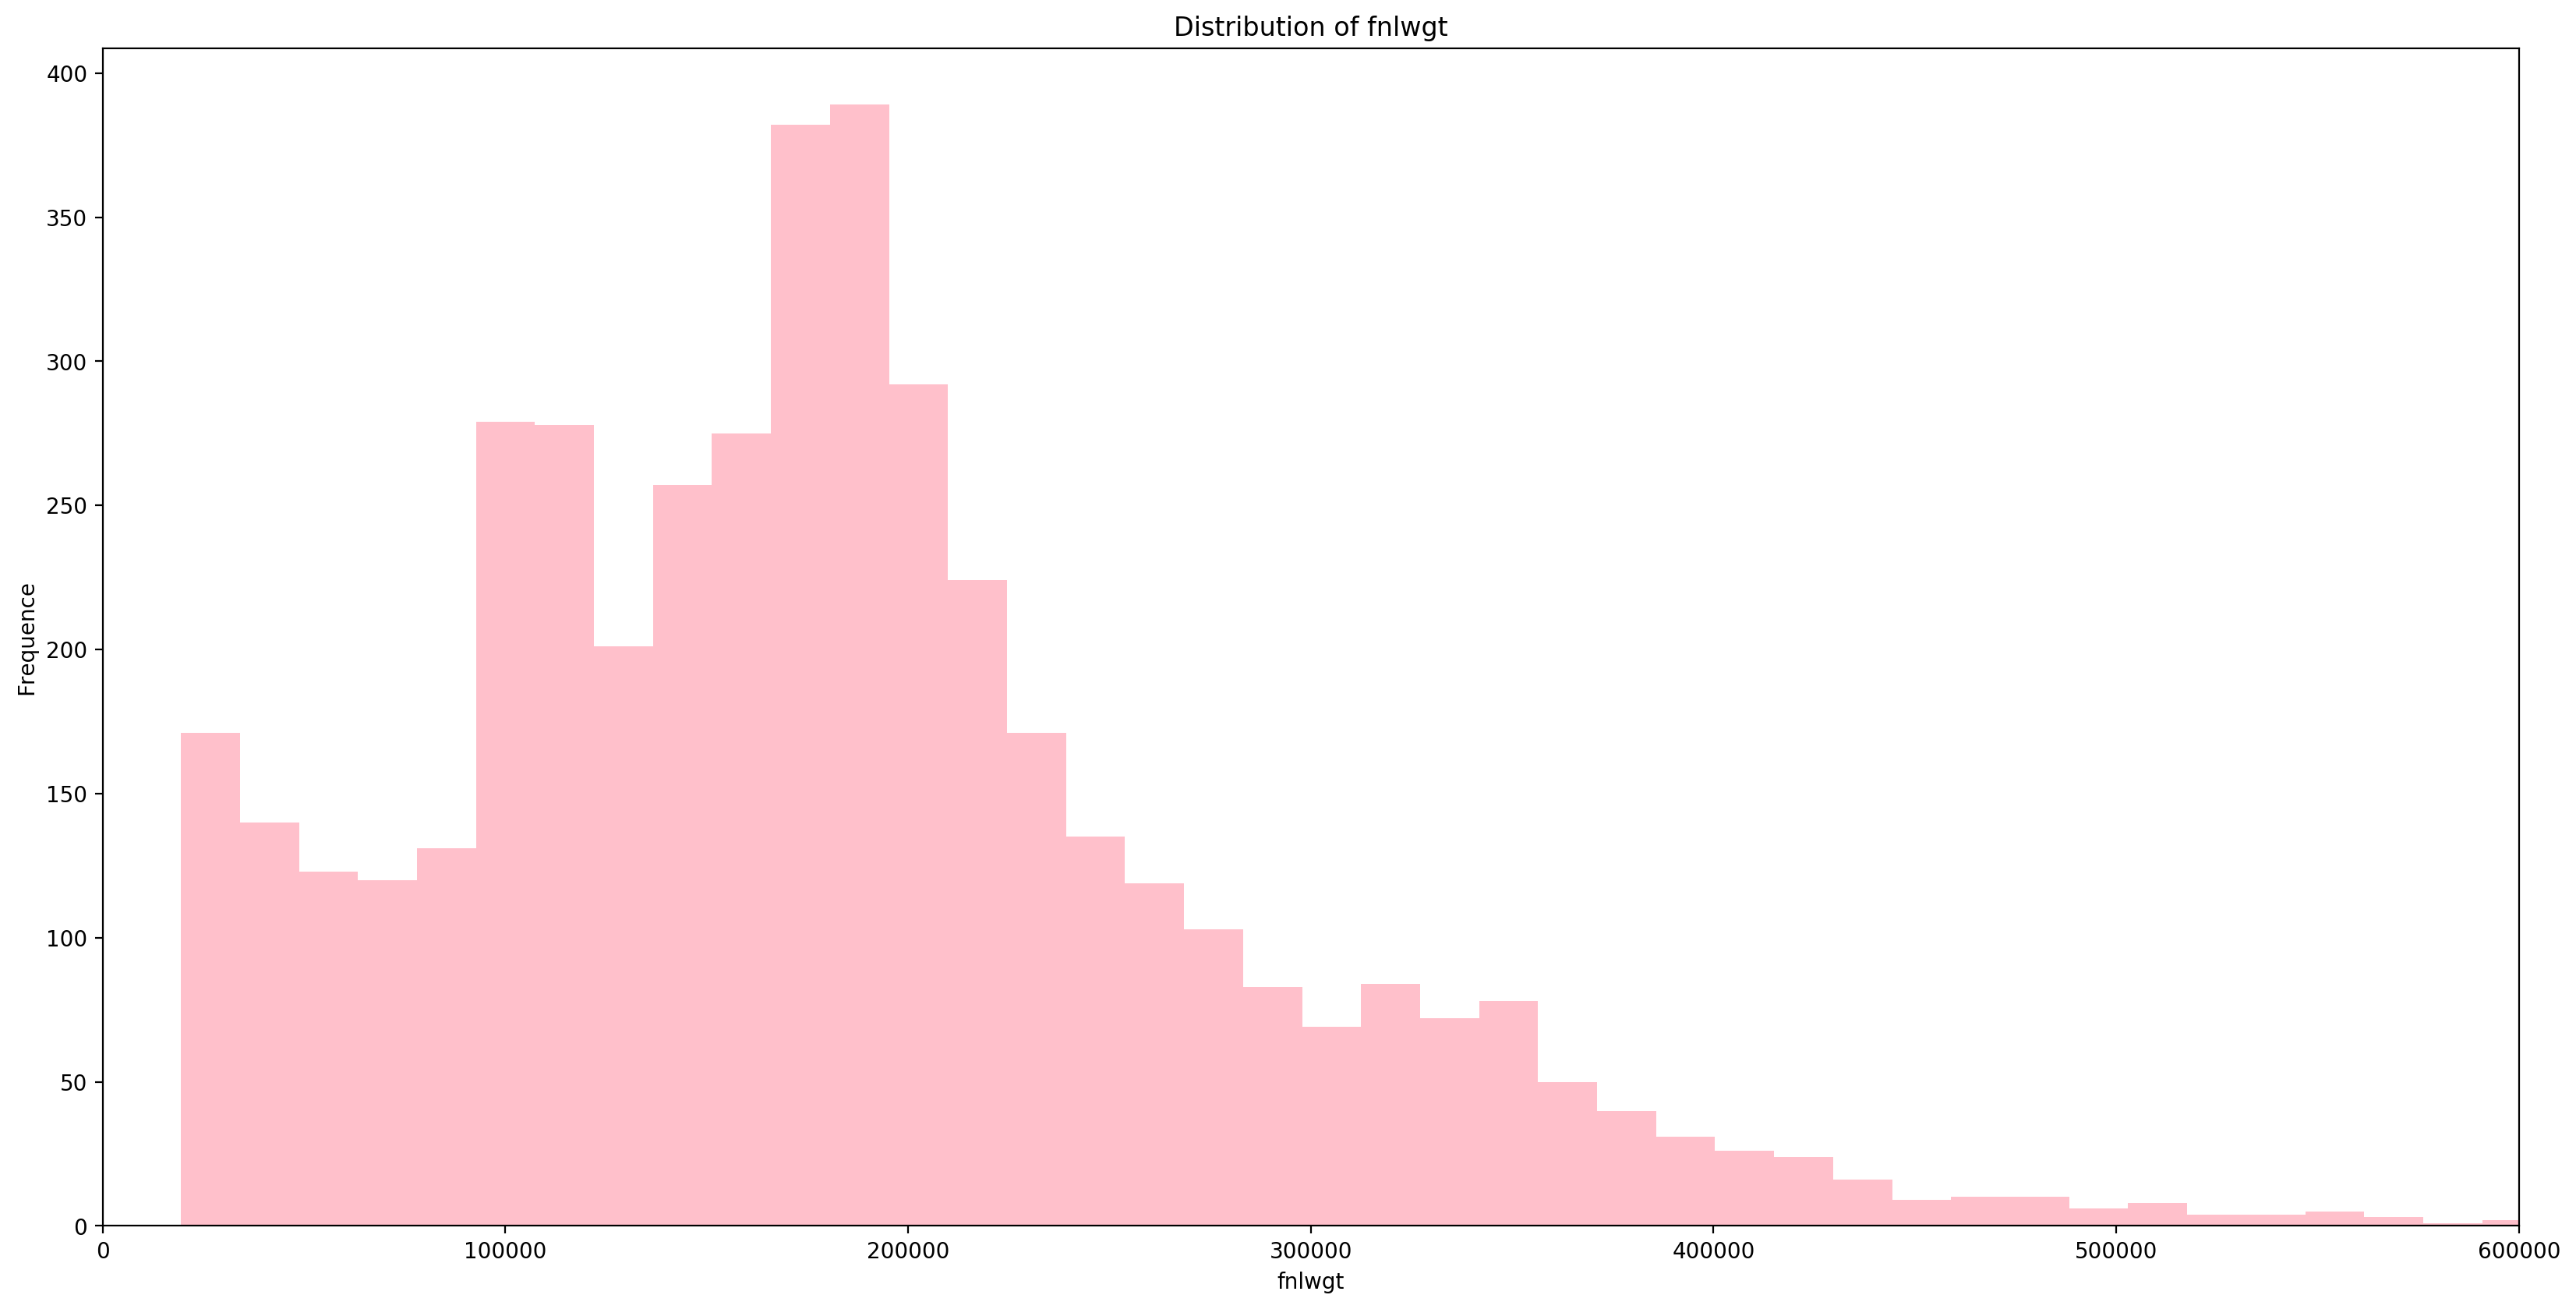

In [66]:
fig = plt.figure(figsize=(20,10), dpi=200)
plt.hist(df.iloc[:,[2,5]][df.iloc[:,5] == 'Divorced']['fnlwgt'], bins=100, color='pink')
plt.xlabel('fnlwgt')
plt.ylabel('Frequence')
plt.title('Distribution of fnlwgt')
plt.xlim(0, 600000)

> Ответ: оно мне напоминает ... распределение

In [ ]:
Напоминает распределение Пуассона

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [104]:
df.groupby('result').get_group('>50K').education.value_counts(normalize=True)

Bachelors       0.283255
HS-grad         0.213621
Some-college    0.176891
Masters         0.122306
Prof-school     0.053947
Assoc-voc       0.046040
Doctorate       0.039026
Assoc-acdm      0.033797
10th            0.007907
11th            0.007652
7th-8th         0.005101
12th            0.004209
9th             0.003443
5th-6th         0.002041
1st-4th         0.000765
Name: education, dtype: float64

In [103]:
df.groupby('result').get_group('>50K').education.value_counts(normalize=True)['Bachelors']+\
df.groupby('result').get_group('>50K').education.value_counts(normalize=True)['Masters']+\
df.groupby('result').get_group('>50K').education.value_counts(normalize=True)['Doctorate']

0.4445861497258003

> Ответ: Правда / Нет.

In [ ]:
Ответ: Нет

# Сколько в среднем работают люди в неделю в зависимости от education?

In [105]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [106]:
df.groupby('education')['hours-per-week'].mean()

education
10th            37.052519
11th            33.925957
12th            35.780600
1st-4th         38.255952
5th-6th         38.897898
7th-8th         39.366873
9th             38.044747
Assoc-acdm      40.504217
Assoc-voc       41.610709
Bachelors       42.614006
Doctorate       46.973366
HS-grad         40.575374
Masters         43.836332
Preschool       36.647059
Prof-school     47.425347
Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [107]:
df.groupby('sex')['hours-per-week'].mean()

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [ ]:
df.mean

In [114]:
df.groupby('relationship')['hours-per-week'].mean()

relationship
Husband           44.120139
Not-in-family     40.595665
Other-relative    37.006116
Own-child         33.269337
Unmarried         39.103018
Wife              36.861607
Name: hours-per-week, dtype: float64

In [115]:
(df.groupby('relationship')['hours-per-week'].mean()['Husband']+\
df.groupby('relationship')['hours-per-week'].mean()['Wife']+\
df.groupby('relationship')['hours-per-week'].mean()['Other-relative']+\
df.groupby('relationship')['hours-per-week'].mean()['Own-child'])/4

37.81429995882061

In [118]:
(df.groupby('relationship')['hours-per-week'].mean()['Not-in-family']+\
df.groupby('relationship')['hours-per-week'].mean()['Unmarried'])/2

39.849341626882534

In [117]:
(df.groupby('marital-status')['hours-per-week'].mean()['Divorced']+\
df.groupby('marital-status')['hours-per-week'].mean()['Never-married']+\
df.groupby('marital-status')['hours-per-week'].mean()['Separated']+\
df.groupby('marital-status')['hours-per-week'].mean()['Widowed'])/4

37.61700018166202

In [113]:
(df.groupby('marital-status')['hours-per-week'].mean()['Married-AF-spouse']+\
df.groupby('marital-status')['hours-per-week'].mean()['Married-civ-spouse']+\
df.groupby('marital-status')['hours-per-week'].mean()['Married-spouse-absent'])/3

41.36171567038986

# Из каких стран люди работают farmers/fishers?

In [121]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [127]:
df.groupby('occupation').get_group('Farming-fishing')['native-country'].value_counts()

United-States    879
Mexico            77
Puerto-Rico        5
?                  5
Philippines        4
Guatemala          4
Italy              2
Canada             2
El-Salvador        2
Cuba               2
Vietnam            2
Cambodia           1
England            1
Germany            1
Poland             1
Portugal           1
Ireland            1
France             1
Yugoslavia         1
Japan              1
Hong               1
Name: native-country, dtype: int64

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [129]:
df.tail(n=3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [154]:
len(df[df['hours-per-week']==df['hours-per-week'].max()])

85

In [47]:
df[df['hours-per-week']==df['hours-per-week'].max()]['result']

935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
4308     <=50K
4441      >50K
5376     <=50K
5432     <=50K
6618     <=50K
6898     <=50K
8072     <=50K
8393      >50K
8654     <=50K
8796      >50K
9811     <=50K
9831     <=50K
10143    <=50K
10266    <=50K
10468    <=50K
10986     >50K
11833    <=50K
12209    <=50K
12625    <=50K
12788    <=50K
13558     >50K
13580    <=50K
13617    <=50K
13858     >50K
14593    <=50K
         ...  
23226    <=50K
23398    <=50K
23649     >50K
23830    <=50K
24483     >50K
25354    <=50K
25713     >50K
25806    <=50K
25831     >50K
25986    <=50K
26250    <=50K
26596     >50K
26638    <=50K
26858    <=50K
27222    <=50K
27764    <=50K
27809    <=50K
28112    <=50K
29187     >50K
29751    <=50K
29989     >50K
30036     >50K
30610     >50K
30754    <=50K
30766     >50K
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: result, Length: 85, dtype: object